### 1) Problem Statement
"Trips & Travel.Com" company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information. The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being. However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.


### 2) Data Collection

The Dataset is Collected from https://www.kaggle.com/datasets/susant4learning/holiday-package-purchase-prediction/data.
The Data consist of 20 columns and 4888 rows

In [1]:
## Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
dataset = pd.read_csv('Travel.csv')

In [3]:
dataset.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


### Data Cleaning

#### Handling Missing Values

    1. Handling Missing Values
    2. Handling Duplicates
    3. Check data type
    4. Understand the dataset

In [4]:
## checking for the null values
dataset.isnull().sum()

CustomerID                    0
ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [7]:
#checking all the categories in the dataset
dataset['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [8]:
dataset['MaritalStatus'].value_counts()

MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64

In [9]:
dataset['TypeofContact'].value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [10]:
dataset['Gender'] = dataset['Gender'].replace('Fe Male','Female')
dataset['MaritalStatus'] = dataset['MaritalStatus'].replace('Single','Unmarried')

In [12]:
dataset.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [25]:
## Checking the Missing values
## these are the features that contain nan values

features_with_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() >= 1]
for feature in features_with_nan:

    print(feature,np.round(dataset[feature].isnull().mean()*100,5), '% missing values')

Age 4.62357 % missing values
TypeofContact 0.51146 % missing values
DurationOfPitch 5.13502 % missing values
NumberOfFollowups 0.92062 % missing values
PreferredPropertyStar 0.53191 % missing values
NumberOfTrips 2.86416 % missing values
NumberOfChildrenVisiting 1.35025 % missing values
MonthlyIncome 4.76678 % missing values


In [31]:
dataset[features_with_nan].select_dtypes(exclude='object').describe()

,Age,DurationOfPitch,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,NumberOfChildrenVisiting,MonthlyIncome
count,4662.000000,4637.000000,4843.000000,4862.000000,4748.000000,4822.000000,4655.000000
mean,37.622265,15.490835,3.708445,3.581037,3.236521,1.187267,23619.853491
std,9.316387,8.519643,1.002509,0.798009,1.849019,0.857861,5380.698361
min,18.000000,5.000000,1.000000,3.000000,1.000000,0.000000,1000.000000
25%,31.000000,9.000000,3.000000,3.000000,2.000000,1.000000,20346.000000
50%,36.000000,13.000000,4.000000,3.000000,3.000000,1.000000,22347.000000
75%,44.000000,20.000000,4.000000,4.000000,4.000000,2.000000,25571.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,3.000000,98678.000000


### Imputing Null Values
    
    1. Impute Median Value for Age Column
    2. Impute Mode for Type of Contract
    3. Impute Median for Duration of Pitch
    4. Impute Mode for NumberofFollowup as it is Discret feature
    5. Impute Mode for PreferredPropertyStar
    6. Impute Median for NumberofTrips
    7. Impute Mode for NUmberOfChildrenVisiting
    8. Impute Median for MonthlyIncome

In [36]:
# Age
dataset.Age.fillna(dataset.Age.median(), inplace=True)

# TypeofContact
dataset.TypeofContact.fillna(dataset.TypeofContact.mode()[0], inplace=True)

# DurationofPitch
dataset.DurationOfPitch.fillna(dataset.DurationOfPitch.median(), inplace=True)

# NumberofFollowups
dataset.NumberOfFollowups.fillna(dataset.NumberOfFollowups.mode()[0], inplace=True) 

# PreferredPropertyStar
dataset.PreferredPropertyStar.fillna(dataset.PreferredPropertyStar.mode()[0], inplace=True) 

# NumberofTrips
dataset.NumberOfTrips.fillna(dataset.NumberOfTrips.median(), inplace=True)  

# NumberofChildrenVisiting
dataset.NumberOfChildrenVisiting.fillna(dataset.NumberOfChildrenVisiting.mode()[0], inplace=True)

# MonthlyIncome
dataset.MonthlyIncome.fillna(dataset.MonthlyIncome.median(), inplace=True)  

In [37]:
dataset.drop(['CustomerID'], axis=1, inplace=True)

In [38]:
dataset.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


## Feature Engineering

#### Feature Extraction

In [39]:
dataset.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Unmarried,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [40]:
## Creating a new column called 'total visitors' which is the sum of NumberofChildrenVisiting and NumberofAdults
dataset['TotalVisitors'] = dataset['NumberOfChildrenVisiting'] + dataset['NumberOfPersonVisiting']

## dropping the NumberofChildrenVisiting and NumberofAdults columns as they are no longer needed
dataset.drop(['NumberOfChildrenVisiting', 'NumberOfPersonVisiting'], axis=1, inplace=True)

In [ ]:
## counting all the numerical features
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtype != 'O' ]
print('Numerical Features Count: ', len(numerical_features))

Numerical Features Count:  12


In [43]:
## counting all the categorical features
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtype == 'O' ]
print('Categorical Features Count: ', len(categorical_features))

Categorical Features Count:  6


In [45]:
## couting Discrete Features
discrete_features = [feature for feature in numerical_features if len(dataset[feature].unique()) <= 25]
print('Discrete Features Count: ', len(discrete_features))

Discrete Features Count:  9


In [46]:
## counting Continuous Features
continuous_features = [feature for feature in numerical_features if feature not in discrete_features]
print('Continuous Features Count: ', len(continuous_features))

Continuous Features Count:  3


In [49]:
dataset.head() ## ProdTaken is the target variable and remaining are the features or input variables

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitors
0,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


### Train Test Split and Model Training

In [47]:
from sklearn.model_selection import train_test_split
X = dataset.drop(['ProdTaken'], axis=1)
y = dataset['ProdTaken']

In [50]:
X.head()

,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisitors
0,41.0,Self Enquiry,3,6.0,Salaried,Female,3.0,Deluxe,3.0,Unmarried,1.0,1,2,1,Manager,20993.0,3.0
1,49.0,Company Invited,1,14.0,Salaried,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,37.0,Self Enquiry,1,8.0,Free Lancer,Male,4.0,Basic,3.0,Unmarried,7.0,1,3,0,Executive,17090.0,3.0
3,33.0,Company Invited,1,9.0,Salaried,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,36.0,Self Enquiry,1,8.0,Small Business,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0


In [54]:
y.head()
y.value_counts()

ProdTaken
0    3968
1     920
Name: count, dtype: int64

In [55]:
## train test split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state=42)

In [56]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3910, 17), (978, 17), (3910,), (978,))

In [57]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4888 non-null   float64
 1   TypeofContact           4888 non-null   object 
 2   CityTier                4888 non-null   int64  
 3   DurationOfPitch         4888 non-null   float64
 4   Occupation              4888 non-null   object 
 5   Gender                  4888 non-null   object 
 6   NumberOfFollowups       4888 non-null   float64
 7   ProductPitched          4888 non-null   object 
 8   PreferredPropertyStar   4888 non-null   float64
 9   MaritalStatus           4888 non-null   object 
 10  NumberOfTrips           4888 non-null   float64
 11  Passport                4888 non-null   int64  
 12  PitchSatisfactionScore  4888 non-null   int64  
 13  OwnCar                  4888 non-null   int64  
 14  Designation             4888 non-null   

In [58]:
# Create Column Transformer with 3 types of Transformers

categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first') # drop first column to avoid dummy variable trap 

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", categorical_transformer, categorical_features),
        ("StandardScaler", numeric_transformer, numerical_features)
    ]
)

In [ ]:
## applying transformation on train with fit_transform
X_train = preprocessor.fit_transform(X_train)

In [ ]:
## applying transformation on test with transform  
X_test = preprocessor.transform(X_test)

In [62]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,0.679690,0.782966,-0.382245,-0.774151
1,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,-0.7214,0.690023,0.282777,-0.725271,1.511598,-0.632399,0.679690,0.782966,-0.459799,0.643615
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,-1.020350,0.282777,1.771041,0.418708,-0.632399,0.679690,0.782966,-0.245196,-0.065268
3,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,...,-0.7214,-1.020350,1.284279,-0.725271,-0.127737,-0.632399,1.408395,-1.277194,0.213475,-0.065268
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.7214,2.400396,-1.720227,-0.725271,1.511598,-0.632399,-0.049015,-1.277194,-0.024889,2.061382


In [63]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,-0.287333,1.284279,-0.725271,-1.220627,-0.632399,-0.777720,-1.277194,-0.737510,-0.774151
1,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,0.366823,-0.531672,0.282777,0.522885,-1.220627,1.581280,1.408395,-1.277194,-0.670411,-0.065268
2,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,...,1.455047,0.812193,0.282777,-0.725271,0.965153,-0.632399,1.408395,0.782966,-0.420832,-0.774151
3,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,-0.721400,2.522566,2.285781,-0.725271,1.511598,-0.632399,-0.049015,0.782966,-0.113658,0.643615
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.455047,-1.020350,0.282777,0.522885,-0.127737,1.581280,0.679690,0.782966,-0.317047,2.061382


### Random Forest Classifier Training

In [78]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score, precision_score,f1_score,roc_auc_score,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [79]:
models = {
    "Random Forest" :  RandomForestClassifier(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Logistic Regression" : LogisticRegression(),
}

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = models[model_name]
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Predicting on test data
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # Training Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)  
    model_train_f1 = f1_score(y_train, y_train_pred,average='weighted')
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # Testing set Performance
    model_test_accuracy = accuracy_score(y_test, y_pred)
    model_test_recall = recall_score(y_test, y_pred)
    model_test_precision = precision_score(y_test, y_pred)
    model_test_f1 = f1_score(y_test, y_pred,average='weighted')
    model_test_roc_auc = roc_auc_score(y_test, y_pred)

    print(list(models.keys())[i])

    print("----------------------------------------------------")
    print('Model performance on training set:')
    print("----------------------------------------------------")
    print('- Accuracy: {:.2f}%'.format(model_train_accuracy * 100))
    print('- Recall: {:.2f}%'.format(model_train_recall * 100))
    print('- Precision: {:.2f}%'.format(model_train_precision * 100))
    print('- F1 Score: {:.2f}%'.format(model_train_f1 * 100))
    print('- ROC AUC Score: {:.2f}%'.format(model_train_roc_auc * 100))
    print("\n")

    print("----------------------------------------------------")
    print('\nModel performance on testing set:')
    print("----------------------------------------------------")
    print('- Accuracy: {:.2f}%'.format(model_test_accuracy * 100))
    print('- Recall: {:.2f}%'.format(model_test_recall * 100))
    print('- Precision: {:.2f}%'.format(model_test_precision * 100))
    print('- F1 Score: {:.2f}%'.format(model_test_f1 *100))
    print('- ROC AUC Score: {:.2f}%'.format(model_test_roc_auc * 100))
    print("----------------------------------------------------")
    print("----------------------------------------------------")
    print("\n")


Random Forest
----------------------------------------------------
Model performance on training set:
----------------------------------------------------
- Accuracy: 100.00%
- Recall: 100.00%
- Precision: 100.00%
- F1 Score: 100.00%
- ROC AUC Score: 100.00%


----------------------------------------------------

Model performance on testing set:
----------------------------------------------------
- Accuracy: 92.84%
- Recall: 65.45%
- Precision: 96.90%
- F1 Score: 92.28%
- ROC AUC Score: 82.47%
----------------------------------------------------
----------------------------------------------------


Decision Tree
----------------------------------------------------
Model performance on training set:
----------------------------------------------------
- Accuracy: 100.00%
- Recall: 100.00%
- Precision: 100.00%
- F1 Score: 100.00%
- ROC AUC Score: 100.00%


----------------------------------------------------

Model performance on testing set:
------------------------------------------

### Hyperparameter Tuning

In [80]:
rf_param = {
    'max_depth': [5,8,15,None,20],
    'n_estimators': [ 100, 200,500,1000],
    'max_features': [5,7,"auto",8],
    "min_samples_split": [2, 8, 10,15,20,],
}

In [82]:
## Models List for Hyperparameter Tuning
randomcv_models = [
    ("RF", RandomForestClassifier(), rf_param),
]

In [87]:
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for model_name, model, params in randomcv_models:
    print(f"Training {model_name} with RandomizedSearchCV...")
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions= params, 
        n_iter=100,
        cv=3,
        verbose=2,
        n_jobs=-1)
    
    # Fit the model
    random_search.fit(X_train, y_train)
    
    best_model = random_search.best_params_
    model_param[model_name] = best_model
    
    for model_name in model_param:
        # print(f"Best parameters for {model_name}: {model_param[model_name]}")
        print(f"Best parameters for {model_name}: {random_search.best_params_}")
        print(f"Best score for {model_name}: {random_search.best_score_}\n")

Training RF with RandomizedSearchCV...
Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters for RF: {'n_estimators': 500, 'min_samples_split': 2, 'max_features': 8, 'max_depth': 15}
Best score for RF: 0.91739175129911



In [90]:
models = {
    "Random Forest" : RandomForestClassifier(n_estimators=1000, max_depth=None, max_features=7, min_samples_split=2)
}

for i in range(len(list(models))):
    model_name = list(models.keys())[i]
    model = models[model_name]
    
    # Fitting the model
    model.fit(X_train, y_train)
    
    # Predicting on test data
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    # Training Performance
    model_train_accuracy = accuracy_score(y_train, y_train_pred)
    model_train_recall = recall_score(y_train, y_train_pred)
    model_train_precision = precision_score(y_train, y_train_pred)  
    model_train_f1 = f1_score(y_train, y_train_pred,average='weighted')
    model_train_roc_auc = roc_auc_score(y_train, y_train_pred)

    # Testing set Performance
    model_test_accuracy = accuracy_score(y_test, y_pred)
    model_test_recall = recall_score(y_test, y_pred)
    model_test_precision = precision_score(y_test, y_pred)
    model_test_f1 = f1_score(y_test, y_pred,average='weighted')
    model_test_roc_auc = roc_auc_score(y_test, y_pred)

    print(list(models.keys())[i])

    print("----------------------------------------------------")
    print('Model performance on training set:')
    print("----------------------------------------------------")
    print('- Accuracy: {:.2f}%'.format(model_train_accuracy * 100))
    print('- Recall: {:.2f}%'.format(model_train_recall * 100))
    print('- Precision: {:.2f}%'.format(model_train_precision * 100))
    print('- F1 Score: {:.2f}%'.format(model_train_f1 * 100))
    print('- ROC AUC Score: {:.2f}%'.format(model_train_roc_auc * 100))
    print("\n")

    print("----------------------------------------------------")
    print('\nModel performance on testing set:')
    print("----------------------------------------------------")
    print('- Accuracy: {:.2f}%'.format(model_test_accuracy * 100))
    print('- Recall: {:.2f}%'.format(model_test_recall * 100))
    print('- Precision: {:.2f}%'.format(model_test_precision * 100))
    print('- F1 Score: {:.2f}%'.format(model_test_f1 *100))
    print('- ROC AUC Score: {:.2f}%'.format(model_test_roc_auc * 100))
    print("----------------------------------------------------")
    print("----------------------------------------------------")
    print("\n")


Random Forest
----------------------------------------------------
Model performance on training set:
----------------------------------------------------
- Accuracy: 100.00%
- Recall: 100.00%
- Precision: 100.00%
- F1 Score: 100.00%
- ROC AUC Score: 100.00%


----------------------------------------------------

Model performance on testing set:
----------------------------------------------------
- Accuracy: 93.15%
- Recall: 67.02%
- Precision: 96.97%
- F1 Score: 92.65%
- ROC AUC Score: 83.25%
----------------------------------------------------
----------------------------------------------------




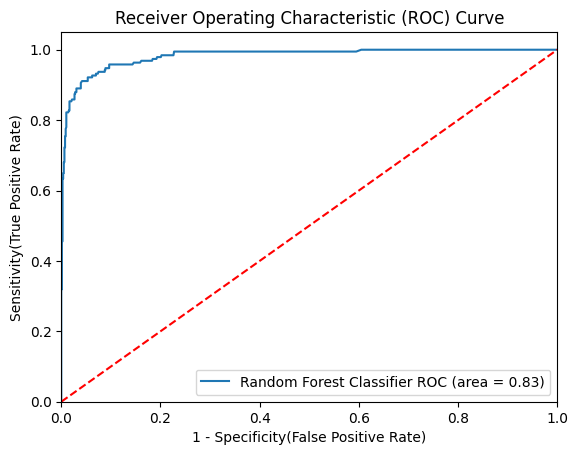

In [93]:
## Plot ROC AUC Curve

from sklearn.metrics import roc_curve, roc_auc_score
plt.figure()

## Adding the models to the list that we want to plot the ROC AUC curve for
auc_models = [
    {
        'label':'Random Forest Classifier',
        'model': RandomForestClassifier(n_estimators=1000, max_depth=None, max_features=7, min_samples_split=2),
        'auc': 0.8325
    },

]

# Creating loop to plot the ROC AUC curve for each model
for algo in auc_models:
    model = algo['model']   ## selecting the model
    model.fit(X_train, y_train)     ## fitting the model
    ## Computing FPR and TPR and threshold
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1]) 
    ## Calculating AUC
    plt.plot(fpr,tpr,label = '%s ROC (area = %0.2f)' % (algo['label'], algo['auc']))
# Plotting the ROC AUC curve
plt.plot([0, 1], [0, 1], 'r--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()



